In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
transaction = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='Transactions')

In [22]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01,802.26
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01,104.24
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01,1592.19
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01,91.15


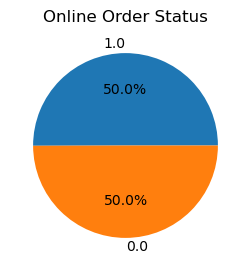

In [23]:
status_counts=transactions['online_order'].value_counts()

# #plotting the graph
status_counts.plot.pie(figsize=(4, 3), autopct='%1.1f%%')
plt.ylabel('')
plt.title('Online Order Status')
plt.show()


In [25]:
Customer_demographic= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerDemographic')
Customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


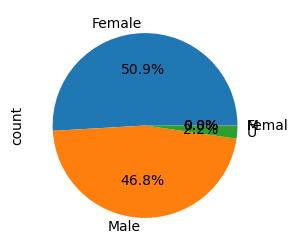

In [27]:
counts=Customer_demographic['gender'].value_counts()

# #plotting the graph
counts.plot.pie(figsize=(4, 3), autopct='%1.1f%%')
plt.show()


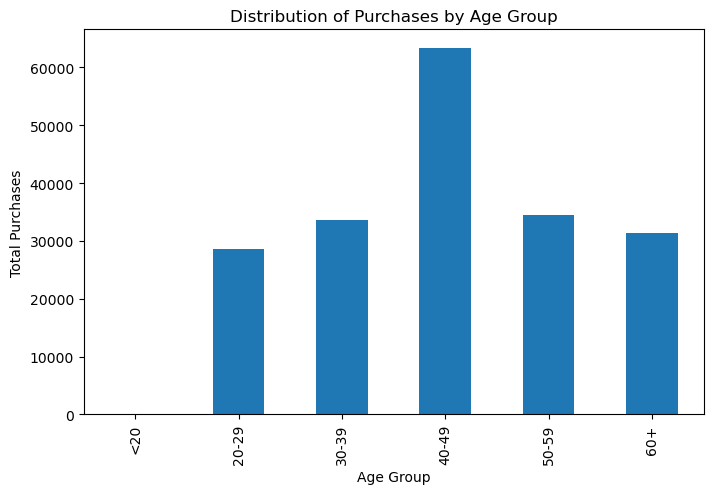

In [33]:
# Defining the age groups and corresponding labels
age_groups = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

# Categorizing the 'age' column into age groups
Customer_demographic['age_group'] = pd.cut(cusdemo['age'], bins=age_groups, labels=age_labels, right=False)

# Group by age group and calculate the sum of purchases
age_group_purchases = Customer_demographic.groupby('age_group')['past_3_years_bike_related_purchases'].sum()

# Plotting the bar chart
age_group_purchases.plot.bar(figsize=(8, 5))
plt.xlabel('Age Group')
plt.ylabel('Total Purchases')
plt.title('Distribution of Purchases by Age Group')
plt.show()


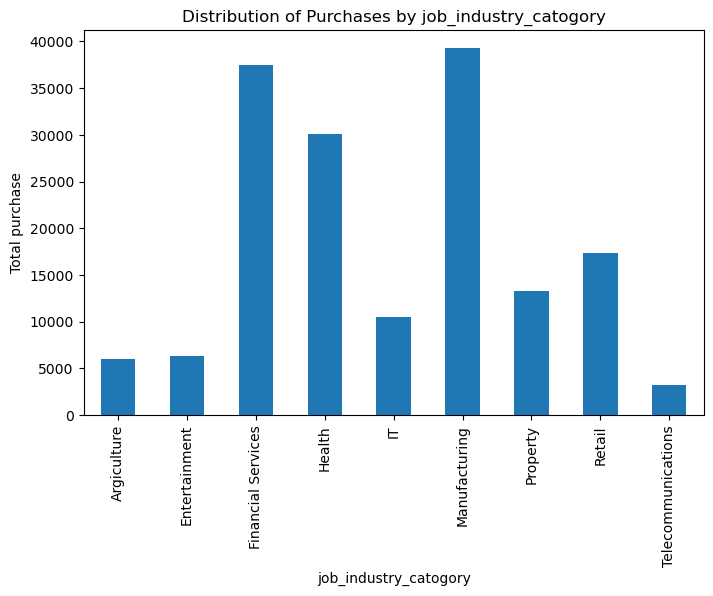

In [34]:
#grouping by gender and calculating the sum of purchases
job_catog=Customer_demographic.groupby('job_industry_category')['past_3_years_bike_related_purchases'].sum()

#plotting the bar chart 
job_catog.plot.bar(figsize=(8,5))
plt.xlabel('job_industry_catogory')
plt.ylabel('Total purchase')
plt.title('Distribution of Purchases by job_industry_catogory')
plt.show()

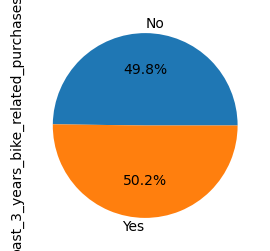

In [36]:
#grouping by owns_Car and calculating the sum of purchases
purchases=Customer_demographic.groupby('owns_car')['past_3_years_bike_related_purchases'].sum()

#plotting the graph
purchases.plot.pie(figsize=(4, 3), autopct='%1.1f%%')
plt.show()

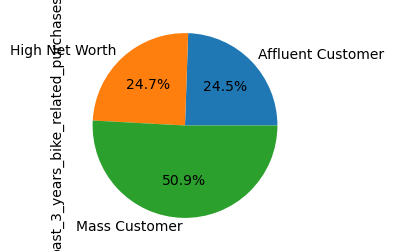

In [37]:
#grouping by wealth_segment and calculating the sum of purchases
segment_purchases=Customer_demographic.groupby('wealth_segment')['past_3_years_bike_related_purchases'].sum()

#plotting the graph
segment_purchases.plot.pie(figsize=(4, 3), autopct='%1.1f%%')
plt.show()

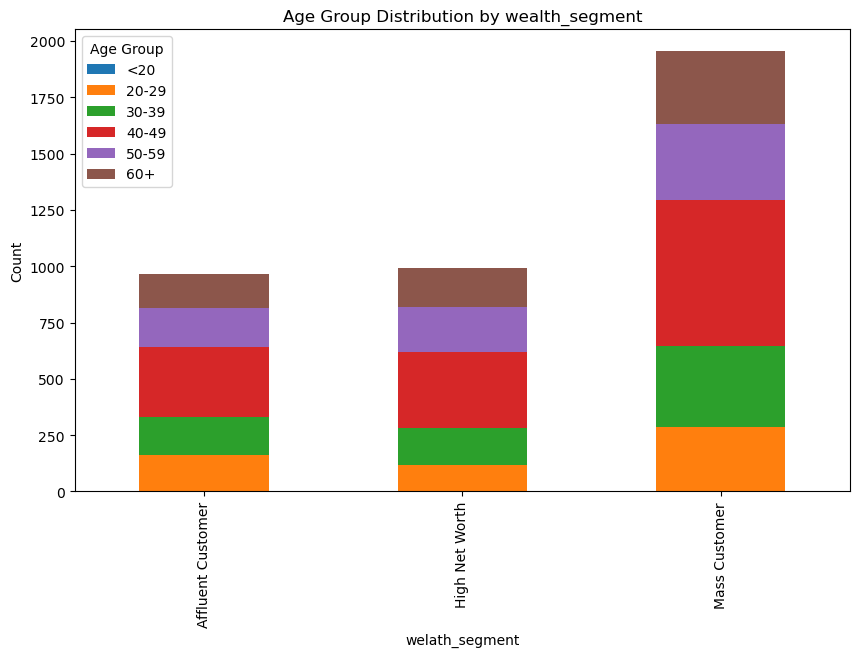

In [44]:
segment_counts = Customer_demographic.groupby('wealth_segment')['age_group'].value_counts().unstack().fillna(0)
segment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('welath_segment')
plt.ylabel('Count')
plt.title('Age Group Distribution by wealth_segment')
plt.legend(title='Age Group')
plt.show()

In [41]:
customer_address= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerAddress')
customer_address.head()


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


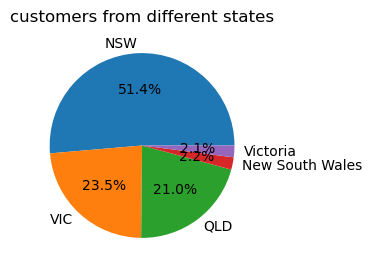

In [43]:
state_counts=customer_address['state'].value_counts()

# #plotting the graph
state_counts.plot.pie(figsize=(4, 3), autopct='%1.1f%%')
plt.ylabel('')
plt.title('customers from different states')
plt.show()

In [51]:
new_customers=pd.read_csv('newcus.csv')
new_customers.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'],
      dtype='object')

In [52]:
# Filter the new customers based on the specified demographic criteria
filtered_customers = new_customers[
    (new_customers['age'].between(40, 49)) &
    (new_customers['job_industry_category'].isin(['Financial Services', 'Manufacturing', 'Health'])) &
    (new_customers['wealth_segment'] == 'Mass Customer') &
    (new_customers['state'] == 'NSW')
]

# Printing the filtered customers
filtered_customers


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875,46.0
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,4,0591 Anzinger Circle,2232,NSW,Australia,10,14,1.593750,46.0
55,Martelle,Tuppeny,Female,52,1981-02-03,Marketing Assistant,Manufacturing,Mass Customer,N,No,9,261 Grayhawk Way,2226,NSW,Australia,10,54,1.381250,42.0
82,Esther,Rooson,Female,14,1981-02-22,NaN,Financial Services,Mass Customer,N,No,5,5186 Main Trail,2046,NSW,Australia,9,78,1.337500,42.0
91,Patricia,Everix,Female,34,1978-02-19,Director of Sales,Health,Mass Customer,N,No,19,91164 Washington Terrace,2263,NSW,Australia,7,89,1.312500,45.0
127,Ricki,Dobrowski,Male,13,1975-03-10,Civil Engineer,Manufacturing,Mass Customer,N,Yes,9,8 Eggendart Pass,2835,NSW,Australia,1,127,1.250000,48.0
138,Daryl,Pauncefort,Female,12,1979-06-18,Community Outreach Specialist,Financial Services,Mass Customer,N,Yes,12,0 Dexter Parkway,2380,NSW,Australia,3,133,1.237500,43.0
165,Robert,Corkill,Male,55,1976-03-12,Clinical Specialist,Health,Mass Customer,N,No,4,5612 Toban Point,2227,NSW,Australia,10,166,1.175000,47.0
183,Harlin,Mazin,Male,34,1974-03-25,Computer Systems Analyst I,Manufacturing,Mass Customer,N,Yes,13,735 Westridge Road,2454,NSW,Australia,7,181,1.158125,49.0
218,Dorian,Stollen,Male,78,1980-02-16,Statistician I,Financial Services,Mass Customer,N,Yes,18,72922 Cambridge Terrace,2026,NSW,Australia,11,219,1.125000,43.0


In [53]:
columns=['first_name', 'last_name', 'gender','job_industry_category','wealth_segment','state']
filtered_customers[columns]

,first_name,last_name,gender,job_industry_category,wealth_segment,state
6,Rutledge,Hallt,Male,Financial Services,Mass Customer,NSW
13,Melba,Spellacy,Female,Health,Mass Customer,NSW
55,Martelle,Tuppeny,Female,Manufacturing,Mass Customer,NSW
82,Esther,Rooson,Female,Financial Services,Mass Customer,NSW
91,Patricia,Everix,Female,Health,Mass Customer,NSW
127,Ricki,Dobrowski,Male,Manufacturing,Mass Customer,NSW
138,Daryl,Pauncefort,Female,Financial Services,Mass Customer,NSW
165,Robert,Corkill,Male,Health,Mass Customer,NSW
183,Harlin,Mazin,Male,Manufacturing,Mass Customer,NSW
218,Dorian,Stollen,Male,Financial Services,Mass Customer,NSW
